## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas_datareader
import datetime

In [3]:
import pandas_datareader as web

In [4]:
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2020,6,20)

In [5]:
facebook = web.DataReader('FB', 'yahoo', start, end)
apple = web.DataReader('AAPL', 'yahoo', start, end)
amazon = web.DataReader('AMZN', 'yahoo', start, end)
netflix = web.DataReader('NFLX', 'yahoo', start, end)
google = web.DataReader('GOOG', 'yahoo', start, end)

## Visualisation

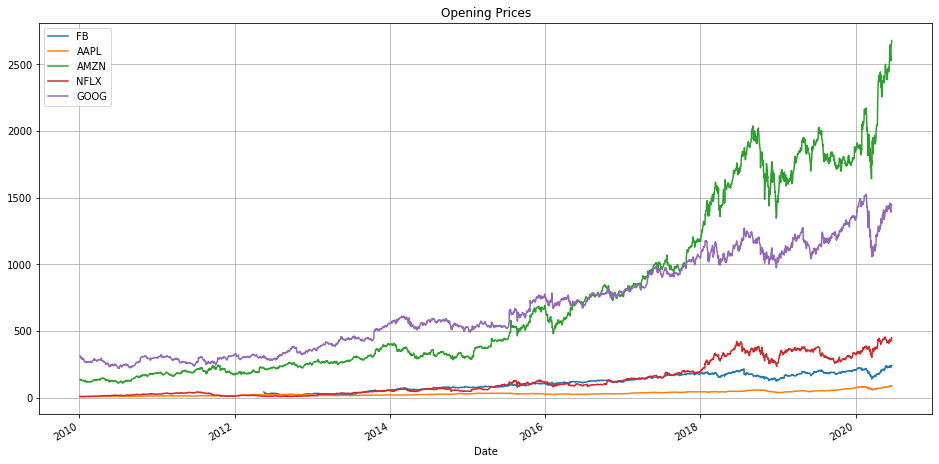

In [6]:
facebook['Open'].plot(label='FB', figsize=(16,8), title='Opening Prices')
apple['Open'].plot(label='AAPL', figsize=(16,8), title='Opening Prices')
amazon['Open'].plot(label='AMZN', figsize=(16,8), title='Opening Prices')
netflix['Open'].plot(label='NFLX', figsize=(16,8), title='Opening Prices')
google['Open'].plot(label='GOOG', figsize=(16,8), title='Opening Prices')
plt.legend()
plt.grid()
plt.show()

## Volume of stock traded each day

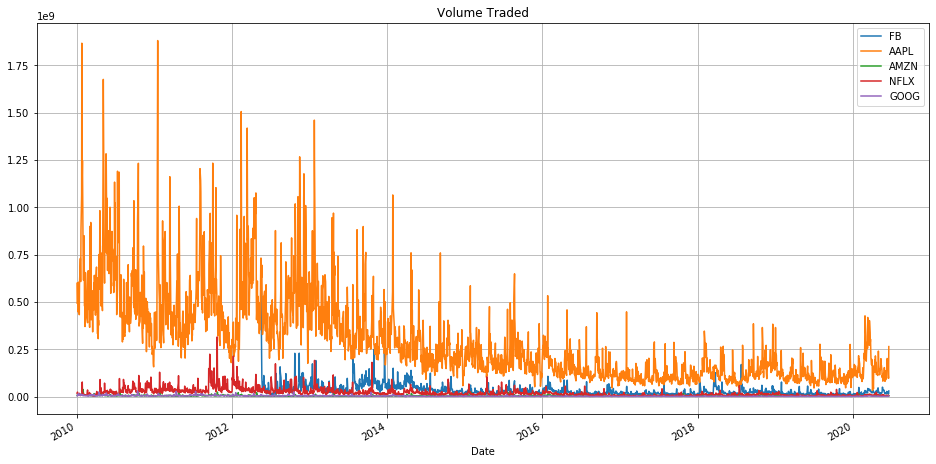

In [7]:
facebook['Volume'].plot(label='FB', figsize=(16,8), title='Volume Traded')
apple['Volume'].plot(label='AAPL', figsize=(16,8), title='Volume Traded')
amazon['Volume'].plot(label='AMZN', figsize=(16,8), title='Volume Traded')
netflix['Volume'].plot(label='NFLX', figsize=(16,8), title='Volume Traded')
google['Volume'].plot(label='GOOG', figsize=(16,8), title='Volume Traded')
plt.legend()
plt.grid()
plt.show()

In [8]:
facebook[facebook['Volume'] == facebook['Volume'].max()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,45.0,38.0,42.049999,38.23,573576400,38.23


In [9]:
apple[apple['Volume'] == apple['Volume'].max()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-18,12.312857,11.642858,11.768572,12.166072,1.880998e+09,10.513179


In [10]:
amazon[amazon['Volume'] == amazon['Volume'].max()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-07-23,119.279999,105.800003,105.93,118.870003,42421100,118.870003


In [11]:
netflix[netflix['Volume'] == netflix['Volume'].max()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-10-25,11.341429,10.607142,10.7,11.052857,315541800.0,11.052857


In [12]:
google[google['Volume'] == google['Volume'].max()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-10-15,299.696655,294.695404,298.516083,299.60202,29760600.0,299.60202


The open price plot really makes it seem like google and amazon have always been much more valuable as a company than the others. But to really understand this we would need to look at the total market cap of the company and not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But we can do a simple calculation to try to represent the total money traded. We could multiply the volume column by the opening price. Remember this isnt the actual market cap, it's just a visual representation of the total amount of money traded around using the time series (e.g. 100 units of stock at USD 10 each versus 100000 units of stock at USD 1 each)

In [13]:
facebook['Total Traded'] = facebook['Open'] * facebook['Volume']
amazon['Total Traded'] = amazon['Open'] * amazon['Volume']
apple['Total Traded'] = apple['Open'] * apple['Volume']
netflix['Total Traded'] = netflix['Open'] * netflix['Volume']
google['Total Traded'] = google['Open'] * google['Volume']

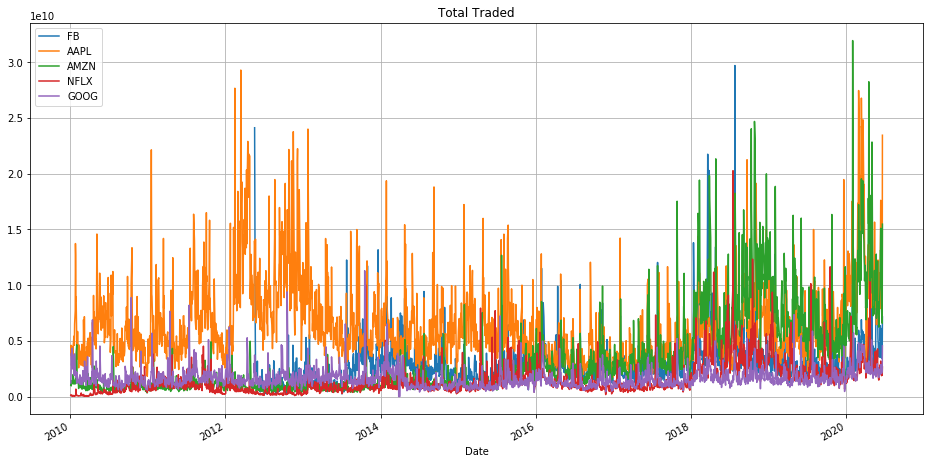

In [14]:
facebook['Total Traded'].plot(label='FB', figsize=(16,8), title='Total Traded')
apple['Total Traded'].plot(label='AAPL', figsize=(16,8), title='Total Traded')
amazon['Total Traded'].plot(label='AMZN', figsize=(16,8), title='Total Traded')
netflix['Total Traded'].plot(label='NFLX', figsize=(16,8), title='Total Traded')
google['Total Traded'].plot(label='GOOG', figsize=(16,8), title='Total Traded')
plt.legend()
plt.grid()
plt.show()

In [15]:
facebook.nlargest(5, ['Total Traded'])

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2018-07-26,180.130005,173.750000,174.889999,176.259995,169803700,176.259995,2.969697e+10
2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000,2.411889e+10
2018-03-20,170.199997,161.949997,167.470001,168.149994,129851800,168.149994,2.174628e+10
2018-03-26,161.100006,149.020004,160.820007,160.059998,126116600,160.059998,2.028207e+10
2018-03-21,173.399994,163.300003,164.800003,169.389999,106598800,169.389999,1.756748e+10


In [16]:
apple.nlargest(5, ['Total Traded'])

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2012-03-14,21.240000,20.549999,20.644644,21.056429,1.418844e+09,18.195688,2.929153e+10
2012-02-15,18.796072,17.746071,18.366428,17.773928,1.506120e+09,15.359146,2.766205e+10
2020-02-28,69.602501,64.092499,64.315002,68.339996,4.268848e+08,68.032837,2.745510e+10
2020-03-12,67.500000,62.000000,63.985001,62.057499,4.184740e+08,61.778580,2.677606e+10
2012-03-15,21.428928,20.662500,21.414642,20.912857,1.159718e+09,18.071619,2.483495e+10


In [17]:
amazon.nlargest(5, ['Total Traded'])

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2020-01-31,2055.719971,2002.270020,2051.469971,2008.719971,15567300,2008.719971,3.193585e+10
2020-04-16,2461.000000,2335.000000,2346.000000,2408.189941,12038200,2408.189941,2.824162e+10
2018-10-26,1698.459961,1603.000000,1649.589966,1642.810059,14963800,1642.810059,2.468413e+10
2018-10-11,1755.400024,1685.099976,1724.000000,1719.359985,13935900,1719.359985,2.402549e+10
2018-10-29,1665.739990,1495.000000,1660.000000,1538.880005,13866100,1538.880005,2.301773e+10


In [18]:
netflix.nlargest(5, ['Total Traded'])

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2018-07-17,385.000000,344.000000,346.950012,379.480011,58410400.0,379.480011,2.026549e+10
2018-10-17,380.000000,356.500000,378.329987,364.700012,32610900.0,364.700012,1.233768e+10
2019-10-17,308.750000,288.299988,304.489990,293.350006,38258900.0,293.350006,1.164945e+10
2018-04-17,338.619995,323.769989,329.660004,336.059998,33866500.0,336.059998,1.116443e+10
2020-04-21,447.000000,425.600006,444.769989,433.829987,23177600.0,433.829987,1.030870e+10


In [19]:
google.nlargest(5, ['Total Traded'])

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2013-10-18,505.834015,485.181427,486.466614,503.816559,23219400.0,503.816559,1.129546e+10
2012-10-18,378.292053,336.737823,376.359314,346.202362,24977900.0,346.202362,9.400665e+09
2010-10-15,299.696655,294.695404,298.516083,299.602020,29760600.0,299.602020,8.884018e+09
2011-07-15,299.004272,292.981842,297.634399,297.694183,27567000.0,297.694183,8.204887e+09
2012-10-19,352.030518,334.745300,351.472595,339.622009,23050400.0,339.622009,8.101584e+09


## Moving Averages

### Facebook

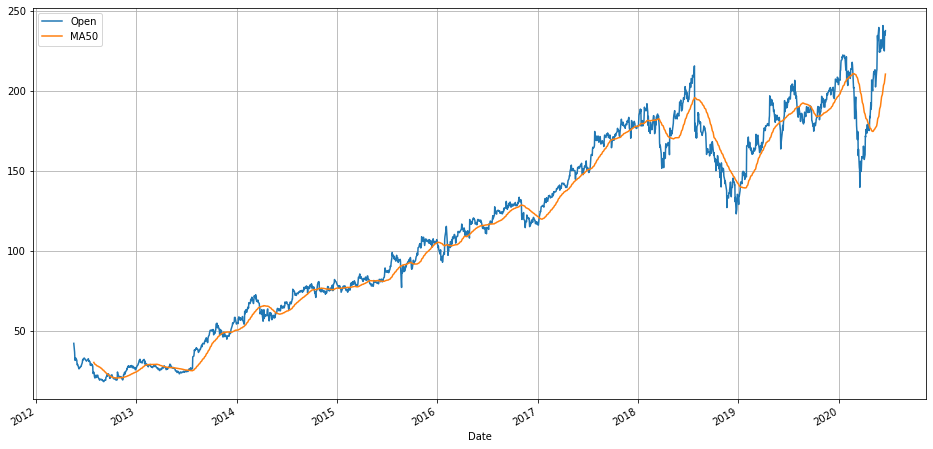

In [20]:
facebook['MA50'] = facebook['Open'].rolling(50).mean()
facebook[['Open','MA50']].plot(figsize=(16,8))
plt.legend()
plt.grid()
plt.show()

### Apple

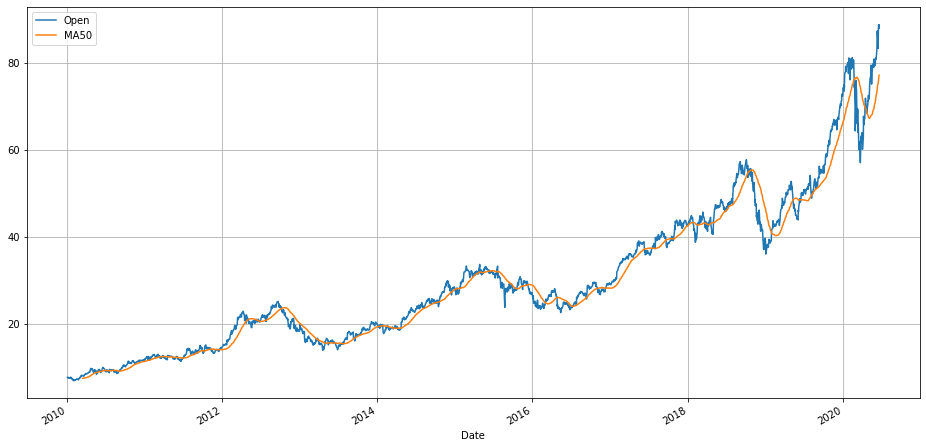

In [21]:
apple['MA50'] = apple['Open'].rolling(50).mean()
apple[['Open','MA50']].plot(figsize=(16,8))
plt.legend()
plt.grid()
plt.show()

### Amazon

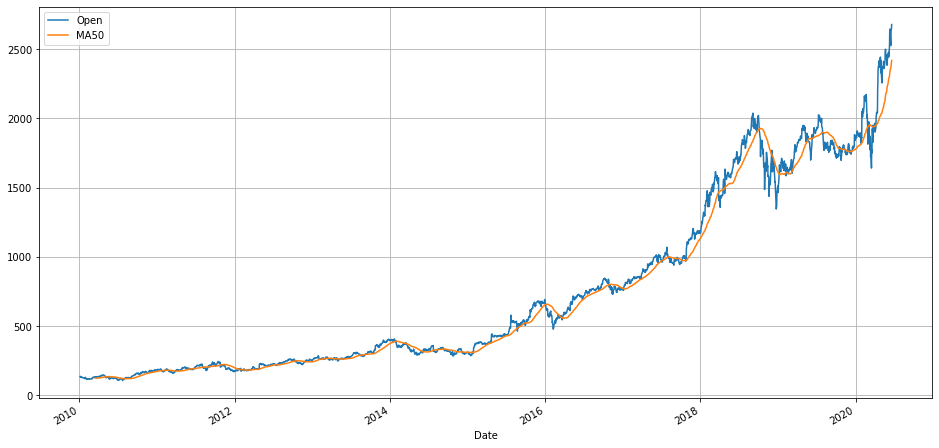

In [22]:
amazon['MA50'] = amazon['Open'].rolling(50).mean()
amazon[['Open','MA50']].plot(figsize=(16,8))
plt.legend()
plt.grid()
plt.show()

### Netflix

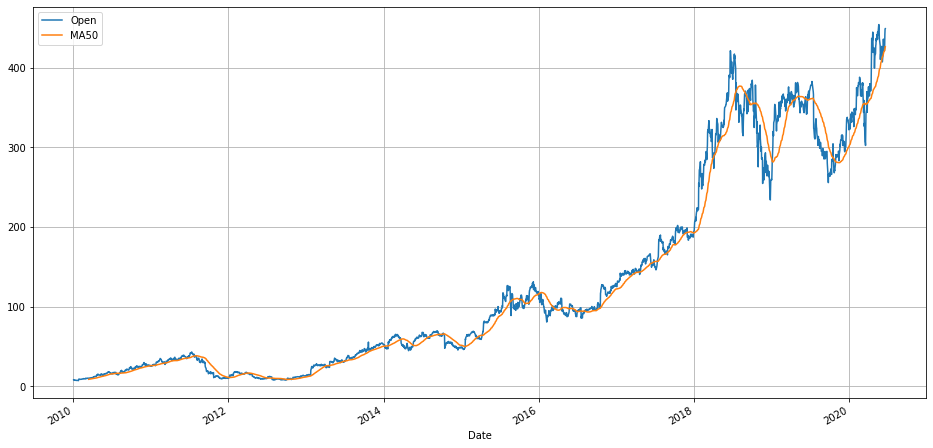

In [23]:
netflix['MA50'] = netflix['Open'].rolling(50).mean()
netflix[['Open','MA50']].plot(figsize=(16,8))
plt.legend()
plt.grid()
plt.show()

### Google

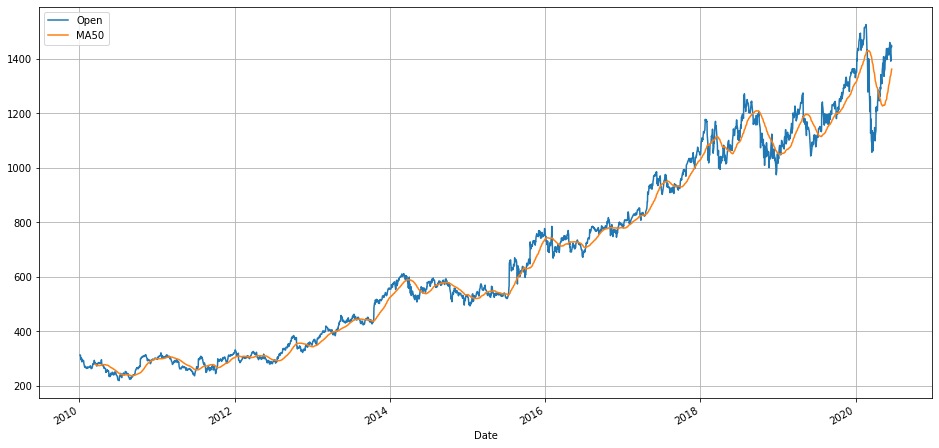

In [24]:
google['MA50'] = google['Open'].rolling(50).mean()
google[['Open','MA50']].plot(figsize=(16,8))
plt.legend()
plt.grid()
plt.show()

## Check for Relationships

In [25]:
from pandas.plotting import scatter_matrix

In [26]:
faang = pd.concat([facebook['Open'], amazon['Open'], apple['Open'], netflix['Open'], google['Open']], axis=1)

In [27]:
faang.columns=['Facebook Open', 'Amazon Open', 'Apple Open', 'Netflix Open', 'Google Open']

In [28]:
faang.head()

,Facebook Open,Amazon Open,Apple Open,Netflix Open,Google Open
Date,,,,,
2010-01-04,NaN,136.250000,7.622500,7.931428,312.304413
2010-01-05,NaN,133.429993,7.664286,7.652857,312.418976
2010-01-06,NaN,134.600006,7.656428,7.361429,311.761444
2010-01-07,NaN,132.009995,7.562500,7.731429,303.562164
2010-01-08,NaN,130.559998,7.510714,7.498571,294.894653


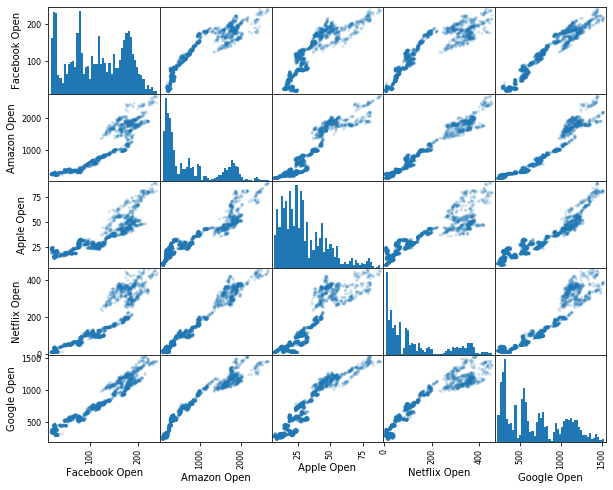

In [29]:
scatter_matrix(faang, figsize = (10,8), alpha = 0.2, hist_kwds={'bins': 50});

# Basic Financial Analysis

## Daily Percent Change

In [30]:
facebook['returns'] = facebook['Close'].pct_change(1)
amazon['returns'] = amazon['Close'].pct_change(1)
apple['returns'] = apple['Close'].pct_change(1)
netflix['returns'] = netflix['Close'].pct_change(1)
google['returns'] = google['Close'].pct_change(1)

### Assessing which stock is more volatile

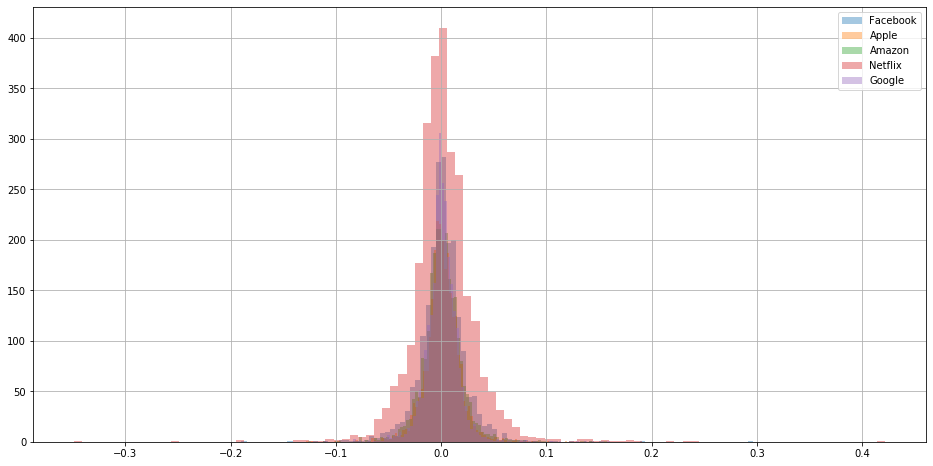

In [31]:
facebook['returns'].hist(bins=100, label='Facebook', figsize=(16,8), alpha=0.4)
apple['returns'].hist(bins=100, label='Apple', figsize=(16,8), alpha=0.4)
amazon['returns'].hist(bins=100, label='Amazon', figsize=(16,8), alpha=0.4)
netflix['returns'].hist(bins=100, label='Netflix', figsize=(16,8), alpha=0.4)
google['returns'].hist(bins=100, label='Google', figsize=(16,8), alpha=0.4)
plt.legend()
plt.show()

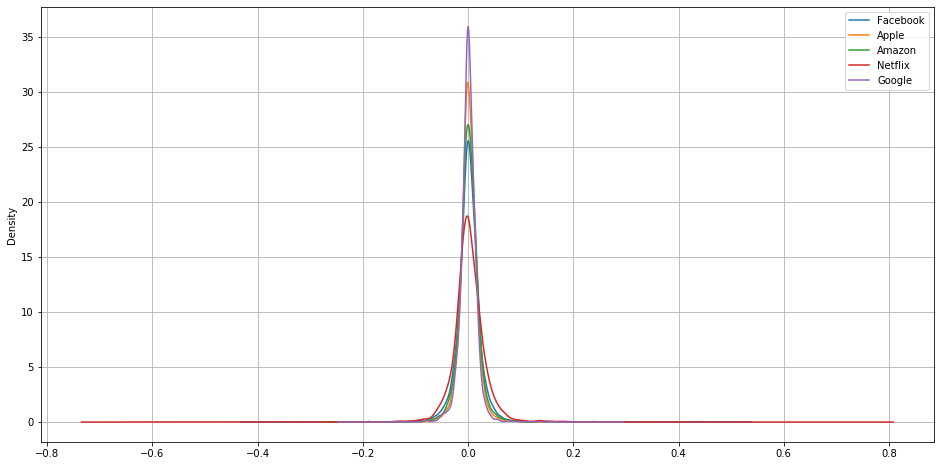

In [32]:
## We will judge this by the variance in the daily returns

facebook['returns'].plot(kind='kde', label='Facebook', figsize=(16,8))
apple['returns'].plot(kind='kde', label='Apple', figsize=(16,8))
amazon['returns'].plot(kind='kde', label='Amazon', figsize=(16,8))
netflix['returns'].plot(kind='kde', label='Netflix', figsize=(16,8))
google['returns'].plot(kind='kde', label='Google', figsize=(16,8))
plt.legend()
plt.grid()
plt.show()

We can see that **Google is the most stable (Heighest peak centered around zero (smallest standard deviation))**. Alot of the daily returns tend to be the same, relatively flat stock. 
The order of most stable to least:

    1) Google
    2) Apple
    3) Amazon
    4) Facebook
    5) Neflix

In [33]:
box_df = pd.concat([facebook['returns'], amazon['returns'], apple['returns'], netflix['returns'], google['returns']], axis=1)

In [34]:
box_df.columns=['Facebook Ret', 'Amazon Ret', 'Apple Ret', 'Netflix Ret', 'Google Ret']

C:\Users\vivek\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


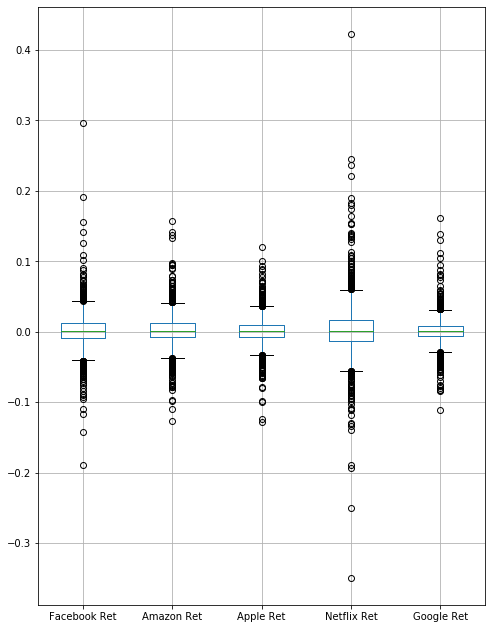

In [35]:
box_df.plot(kind='box', figsize = (8,11))
plt.grid()
plt.show()

## Cumulative Daily Returns

In [36]:
## The simple calculation here doesn't take in to account stocks that give back a dividend
## Cumulative return is computed relative to the day investment is made

In [37]:
facebook['Cumulative Return'] = (1 + facebook['returns']).cumprod()
amazon['Cumulative Return'] = (1 + amazon['returns']).cumprod()
apple['Cumulative Return'] = (1 + apple['returns']).cumprod()
netflix['Cumulative Return'] = (1 + netflix['returns']).cumprod()
google['Cumulative Return'] = (1 + google['returns']).cumprod()

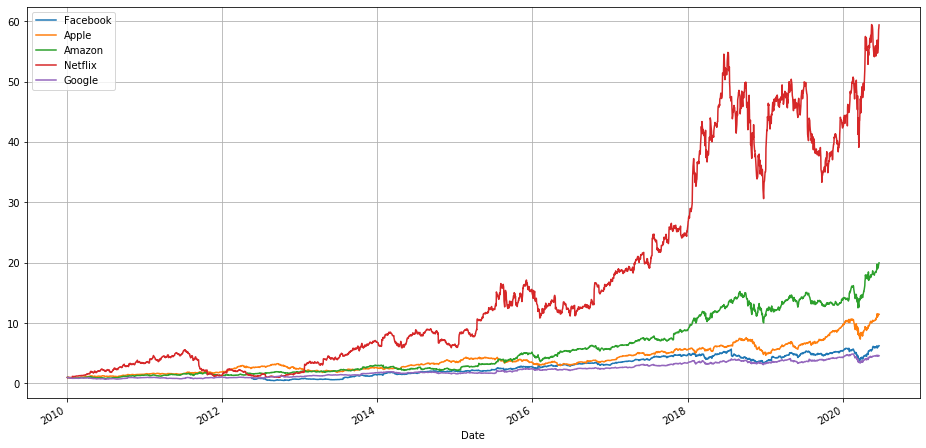

In [38]:
## Assuming Investment was made on Day 1 of the start of the csv files
facebook['Cumulative Return'].plot(label='Facebook', figsize=(16,8))
apple['Cumulative Return'].plot(label='Apple', figsize=(16,8))
amazon['Cumulative Return'].plot(label='Amazon', figsize=(16,8))
netflix['Cumulative Return'].plot(label='Netflix', figsize=(16,8))
google['Cumulative Return'].plot(label='Google', figsize=(16,8))
plt.legend()
plt.grid()
plt.show()

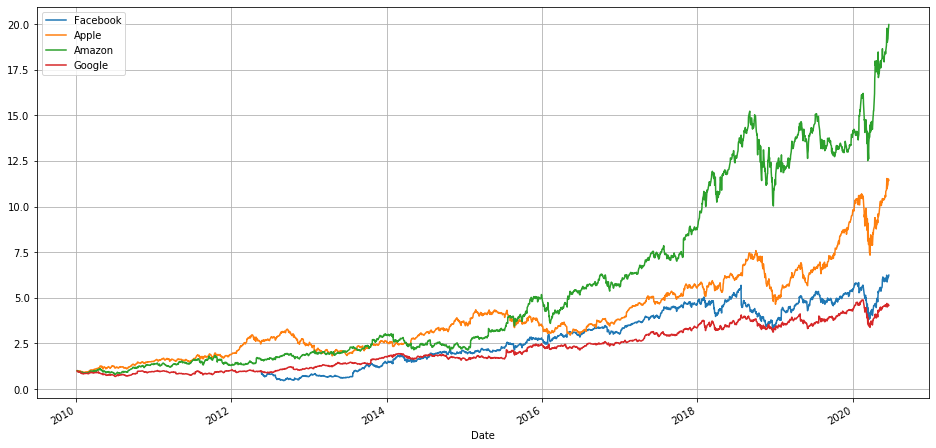

In [39]:
## Assuming Investment was made on Day 1 of the start of the csv files
facebook['Cumulative Return'].plot(label='Facebook', figsize=(16,8))
apple['Cumulative Return'].plot(label='Apple', figsize=(16,8))
amazon['Cumulative Return'].plot(label='Amazon', figsize=(16,8))
#netflix['Cumulative Return'].plot(label='Netflix', figsize=(16,8))
google['Cumulative Return'].plot(label='Google', figsize=(16,8))
plt.legend()
plt.grid()
plt.show()

## We can see that if we invested $1 at the very first time point
## for any of these stocks e.g. Amazon, we would've got cumulative return of $20 at the end of the time point

# Portfolio Allocation

In [40]:
facebook = facebook[['Adj Close']]
apple = apple[['Adj Close']]
amazon = amazon[['Adj Close']]
netflix = netflix[['Adj Close']]
google = google[['Adj Close']]

In [41]:
for stock_df in (apple,facebook,amazon,netflix,google):
    stock_df['Normed Return'] = stock_df['Adj Close'] / stock_df.iloc[0]['Adj Close']

In [42]:
# e.g.
# Assuming we are longing the stock and not short selling
# 20% allocated to each stock

In [43]:
for stock_df, allo in zip((apple,facebook,amazon,netflix,google), [.2, .2, .2, .2, .2]):
    stock_df['Allocation'] = stock_df['Normed Return'] * allo

In [44]:
# Investment of £5000 on Day 1 of stock csv
for stock_df in (apple,facebook,amazon,netflix,google):
    stock_df['Position Values'] = stock_df['Allocation'] * 5000

In [45]:
all_pos_vals = [facebook['Position Values'], apple['Position Values'], amazon['Position Values'], netflix['Position Values'], google['Position Values']]
portfolio_val = pd.concat(all_pos_vals, axis=1)

In [46]:
portfolio_val.columns = ['Facebook Position', 'Apple Position', 'Amazon Position', 'Netflix Position', 'Google Position']

In [47]:
portfolio_val['Total Position'] = portfolio_val.sum(axis=1)

In [48]:
portfolio_val.head()

,Facebook Position,Apple Position,Amazon Position,Netflix Position,Google Position,Total Position
Date,,,,,,
2010-01-04,NaN,1000.000000,1000.000000,1000.000000,1000.000000,4000.000000
2010-01-05,NaN,1001.728722,1005.899989,963.163830,995.596328,3966.388869
2010-01-06,NaN,985.795023,987.677416,997.008221,970.498594,3940.979255
2010-01-07,NaN,983.972808,970.873831,979.805572,947.905863,3882.558073
2010-01-08,NaN,990.514373,997.162139,996.634304,960.542509,3944.853324


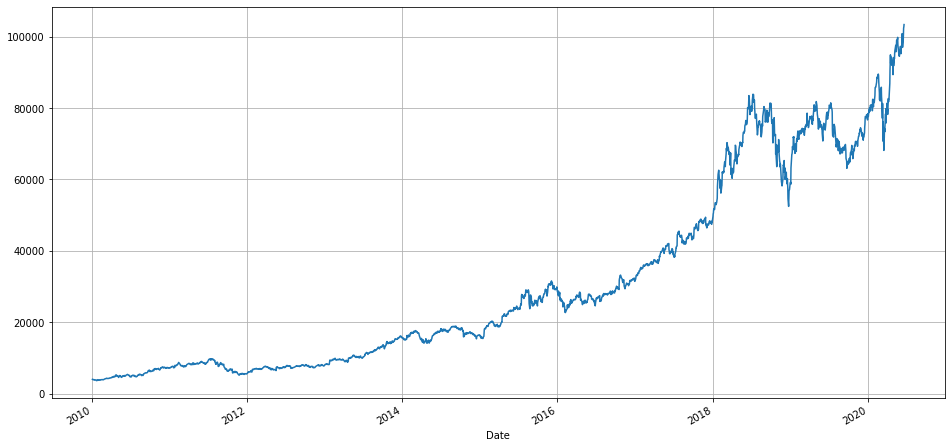

In [49]:
## If I invested £5000 at the start i.e. 2010-01-04
portfolio_val['Total Position'].plot(figsize=(16,8))
plt.grid()
plt.show()

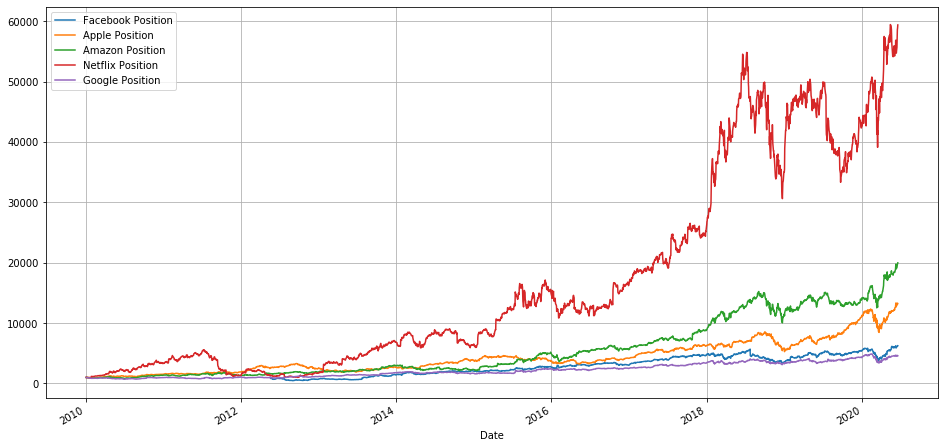

In [50]:
## Viewing the individual position growths 
portfolio_val.drop('Total Position', axis=1).plot(figsize=(16,8))
plt.grid()
plt.show()

## Portfolio Statistics

In [51]:
portfolio_val.head()

,Facebook Position,Apple Position,Amazon Position,Netflix Position,Google Position,Total Position
Date,,,,,,
2010-01-04,NaN,1000.000000,1000.000000,1000.000000,1000.000000,4000.000000
2010-01-05,NaN,1001.728722,1005.899989,963.163830,995.596328,3966.388869
2010-01-06,NaN,985.795023,987.677416,997.008221,970.498594,3940.979255
2010-01-07,NaN,983.972808,970.873831,979.805572,947.905863,3882.558073
2010-01-08,NaN,990.514373,997.162139,996.634304,960.542509,3944.853324


In [52]:
portfolio_val['Daily Returns'] = portfolio_val['Total Position'].pct_change(1)

In [53]:
portfolio_val.head()

,Facebook Position,Apple Position,Amazon Position,Netflix Position,Google Position,Total Position,Daily Returns
Date,,,,,,,
2010-01-04,NaN,1000.000000,1000.000000,1000.000000,1000.000000,4000.000000,NaN
2010-01-05,NaN,1001.728722,1005.899989,963.163830,995.596328,3966.388869,-0.008403
2010-01-06,NaN,985.795023,987.677416,997.008221,970.498594,3940.979255,-0.006406
2010-01-07,NaN,983.972808,970.873831,979.805572,947.905863,3882.558073,-0.014824
2010-01-08,NaN,990.514373,997.162139,996.634304,960.542509,3944.853324,0.016045


In [54]:
portfolio_val['Daily Returns'].mean()

0.0014136876767980502

In [55]:
portfolio_val['Daily Returns'].std()

0.018857995048684125

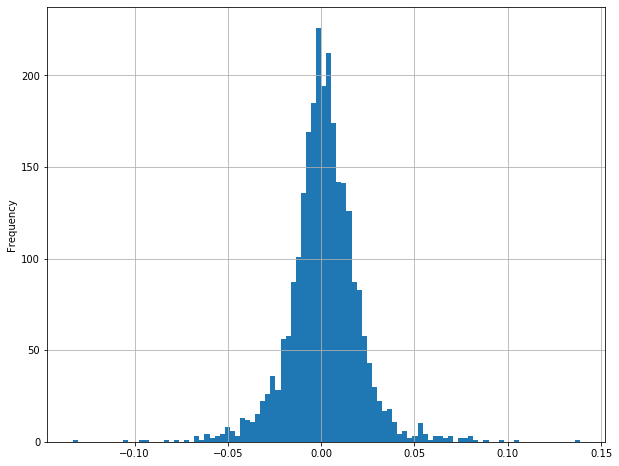

In [56]:
portfolio_val['Daily Returns'].plot(kind='hist', bins=100, figsize=(10,8))
plt.grid()
plt.show()

In [57]:
overall_cum_return = 100 * (portfolio_val['Total Position'][-1] / portfolio_val['Total Position'][0] - 1)

In [58]:
overall_cum_return

2485.2650069158162

In [59]:
## I.e. The bottom figure shows what I would end with if i started with £5000
portfolio_val['Total Position'][-1]

103410.60027663266

In [60]:
## Sharpe Ration is (average portfolio return - risk free rate) / std
## ASSUMING Risk Free (Rf) Rate = 0.00
## Sharpe Ratio is intended to be a yearly data source
## To get the annual SR, you need to multiply by some K value for sampling rate
## In our case our sampling rate is daily, thus we need to multiply it by sqrt(252) as there are 252 business days in a year
## as far as trading days are concerned

SR = (portfolio_val['Daily Returns'].mean() - 0.00) / portfolio_val['Daily Returns'].std()
SR

0.07496489807895536

In [61]:
## Annualised SR
ASR = SR * (252**0.5)
ASR

1.1900308642573174

    Generally an ASR > 1 is considered acceptable/good by investors
    ASR > 2 is rated very good
    ASR > 3 is excellent

    The whole purpose of sharpe ratio is to allow investors to analyse how much greater a return he/she is obtaining in relation to the level of additional risk taken to generate that return

In [62]:
## Now we can test a bunch of random allocations and see which one has the best sharpe ratio
## We randomly assign a weight to each security in our portfolio, then calculate its mean daily return and std.dev of daily return
## We can then plot the allocations on a chart showing returns vs volatility, colored by the sharpe ratio

In [63]:
## Referring back to SR, we want to maximise the SR. Meaning we can create an optimizer that will attempt to 
## minimize the negative sharpe ratio

## Optimization

In [64]:
facebook = facebook[['Adj Close']]
apple = apple[['Adj Close']]
amazon = amazon[['Adj Close']]
netflix = netflix[['Adj Close']]
google = google[['Adj Close']]

In [65]:
stocks = pd.concat([facebook, apple, amazon, netflix, google], axis=1)
stocks.columns = ['Facebook', 'Apple', 'Amazon', 'Netflix', 'Google']

In [66]:
stocks.pct_change(1).mean()

Facebook    0.001173
Apple       0.001132
Amazon      0.001334
Netflix     0.002083
Google      0.000710
dtype: float64

In [67]:
stocks.pct_change(1).corr()

,Facebook,Apple,Amazon,Netflix,Google
Facebook,1.000000,0.370348,0.430309,0.269692,0.481507
Apple,0.370348,1.000000,0.428941,0.240697,0.531372
Amazon,0.430309,0.428941,1.000000,0.403352,0.571393
Netflix,0.269692,0.240697,0.403352,1.000000,0.328283
Google,0.481507,0.531372,0.571393,0.328283,1.000000


In [68]:
stocks.pct_change(1).head()

,Facebook,Apple,Amazon,Netflix,Google
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,0.001729,0.005900,-0.036836,-0.004404
2010-01-06,NaN,-0.015906,-0.018116,0.035139,-0.025209
2010-01-07,NaN,-0.001848,-0.017013,-0.017254,-0.023280
2010-01-08,NaN,0.006648,0.027077,0.017176,0.013331


In [69]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,Facebook,Apple,Amazon,Netflix,Google
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,0.001727,0.005883,-0.037532,-0.004413
2010-01-06,NaN,-0.016034,-0.018282,0.034535,-0.025532
2010-01-07,NaN,-0.001850,-0.017160,-0.017405,-0.023555
2010-01-08,NaN,0.006626,0.026717,0.017030,0.013243


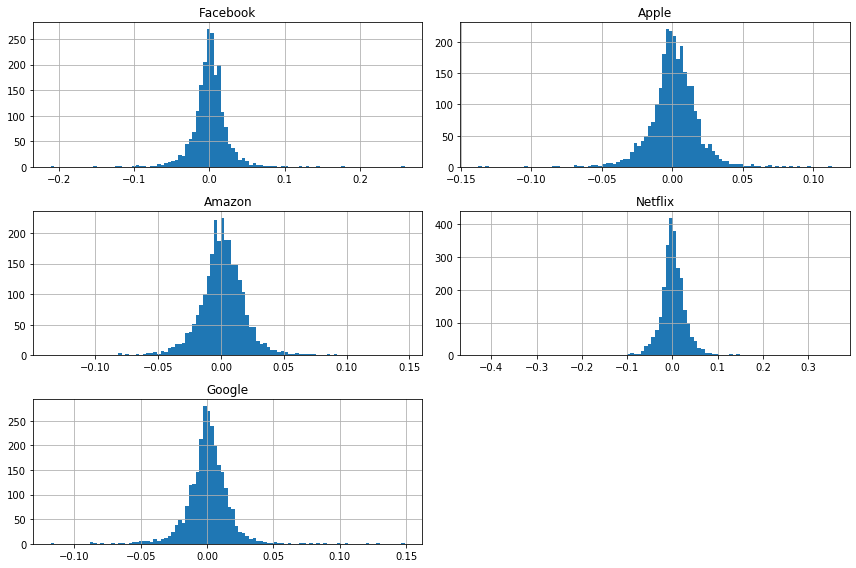

In [70]:
log_ret.hist(bins=100, figsize=(12,8))
plt.tight_layout()

In [71]:
log_ret.mean()

Facebook    0.000901
Apple       0.000980
Amazon      0.001137
Netflix     0.001551
Google      0.000578
dtype: float64

In [72]:
## Multiply log_ret cov with annual business days
log_ret.cov() * 252

,Facebook,Apple,Amazon,Netflix,Google
Facebook,0.136665,0.038631,0.048147,0.048815,0.045323
Apple,0.038631,0.076489,0.037324,0.035821,0.038051
Amazon,0.048147,0.037324,0.098506,0.066052,0.046383
Netflix,0.048815,0.035821,0.066052,0.267380,0.044337
Google,0.045323,0.038051,0.046383,0.044337,0.066259


In [73]:
np.random.seed(101)

num_ports = 25000
all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    ## Weights
    weights = np.array(np.random.random(5))
    weights = weights/np.sum(weights)

    ## Save Weights
    all_weights[ind,:] = weights
    
    ## Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights)* 252)

    ## Expected Volatility
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252, weights)))

    ## Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [74]:
sharpe_arr.max()

1.1319315848848814

In [75]:
sharpe_arr.argmax()

1055

In [76]:
all_weights[sharpe_arr.argmax(),:]

array([0.05479814, 0.39791682, 0.37450323, 0.16470885, 0.00807296])

In [77]:
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

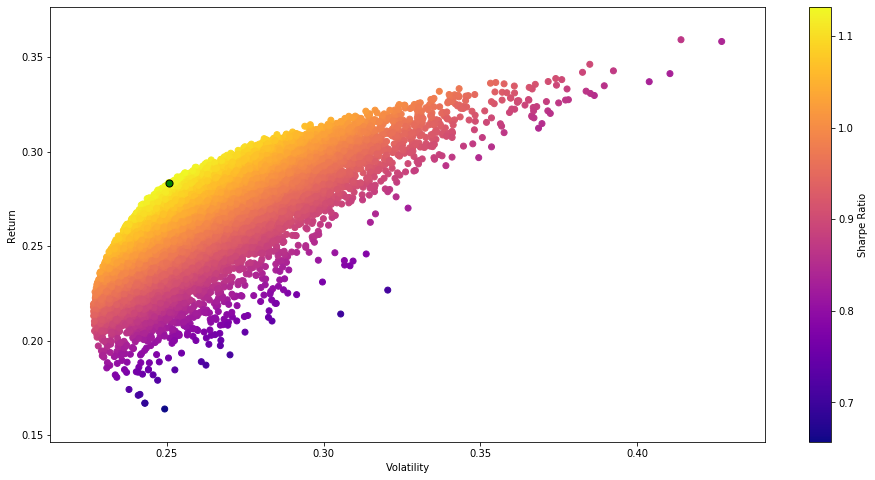

In [78]:
plt.figure(figsize=(16,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(max_sr_vol, max_sr_ret, c='green', s=50, edgecolors='black')
plt.show()

## Markowitz Portfolio Optimization - Useful if you have many stocks

In [79]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [80]:
from scipy.optimize import minimize

In [81]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

In [82]:
## Our allocations need to add up to one as long as we are not shorting anything
def check_sum(weights):
    # return 0 if sum of weights is 1
    return np.sum(weights) - 1

In [83]:
cons = ({'type':'eq', 'fun': check_sum})

In [84]:
## Repeat n times for n number of stocks
bounds = ((0,1), (0,1), (0,1), (0,1), (0,1))

In [85]:
## Usually an even % split between the n stocks
init_guess = [0.20, 0.20, 0.20, 0.20, 0.20]

In [86]:
opt_results = minimize(neg_sharpe, init_guess, method = 'SLSQP', bounds=bounds, constraints=cons)

In [87]:
opt_results

     fun: -1.1351877288215881
     jac: array([ 2.57194042e-05, -9.36985016e-05,  9.20742750e-05,  5.35696745e-05,
        1.87963799e-01])
 message: 'Optimization terminated successfully.'
    nfev: 36
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.06515276, 0.43709303, 0.32804677, 0.16970743, 0.        ])

In [88]:
## Allocation
opt_results.x

array([0.06515276, 0.43709303, 0.32804677, 0.16970743, 0.        ])

In [89]:
## Returns the daily returns, volatility and sharpe ratio
get_ret_vol_sr(opt_results.x)

array([0.28312652, 0.24940942, 1.13518773])

In [90]:
## Check all optimal portfolios
## i.e. efficient frontier
## It is the set of optimal portfolios that gives you the highest return for a certain volatility/risk level

## 0.4 is the max y value on plot above - adjust if needed
frontier_y = np.linspace(0, 0.4, 100)

In [91]:
def minimize_vol(weights):
    return get_ret_vol_sr(weights)[1]

In [92]:
frontier_volatility = []

for possible_return in frontier_y:
    cons = ({'type': 'eq', 'fun': check_sum},
           {'type': 'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_vol, init_guess, method = 'SLSQP', bounds=bounds, constraints=cons)
    
    frontier_volatility.append(result['fun'])

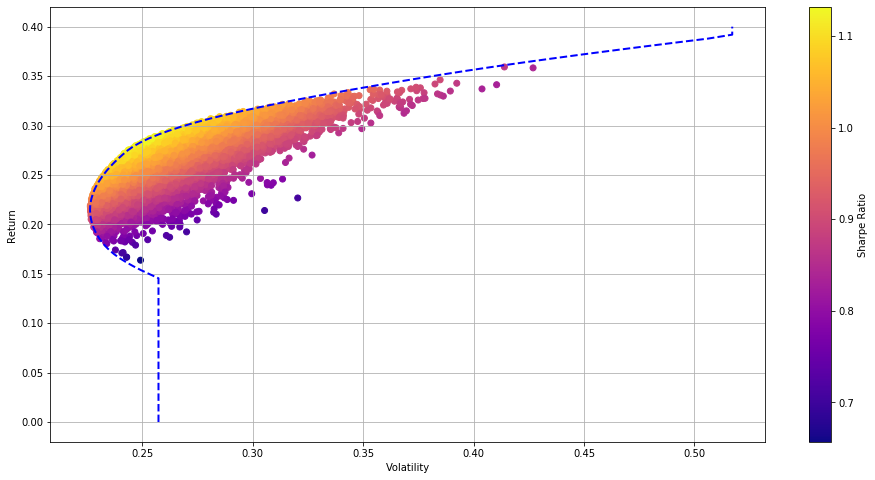

In [93]:
plt.figure(figsize=(16,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.plot(frontier_volatility, frontier_y, 'b--', linewidth=2)
plt.grid()
plt.show()

# CAPM

In [94]:
from scipy import stats

In [95]:
## SPY is an ETF i.e. the market
## CAPM states that there should be some relationship between the stock performance
## and the overall market performance
spy_etf = web.DataReader('SPY','yahoo', start, end)
aapl = web.DataReader('AAPL', 'yahoo', start, end)

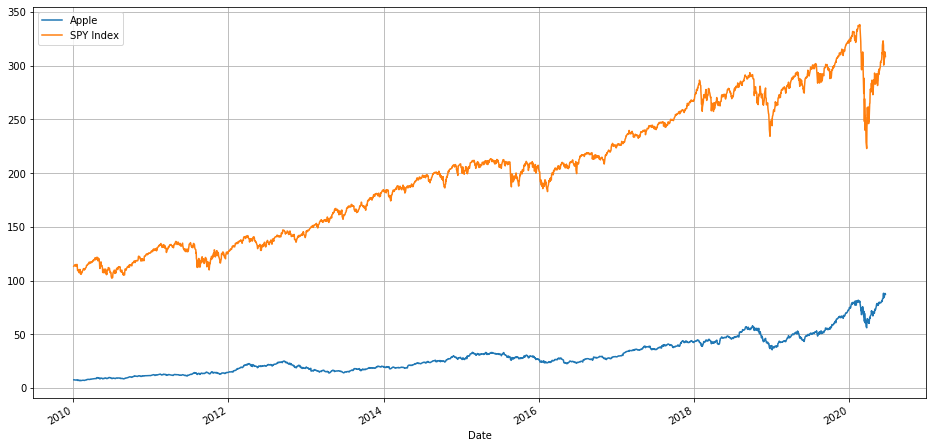

In [96]:
aapl['Close'].plot(label='Apple', figsize=(16,8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend()
plt.grid()
plt.show()

In [97]:
aapl['Cumulative'] = aapl['Close'] / aapl['Close'].iloc[0]

In [98]:
spy_etf['Cumulative'] = spy_etf['Close'] / spy_etf['Close'].iloc[0]

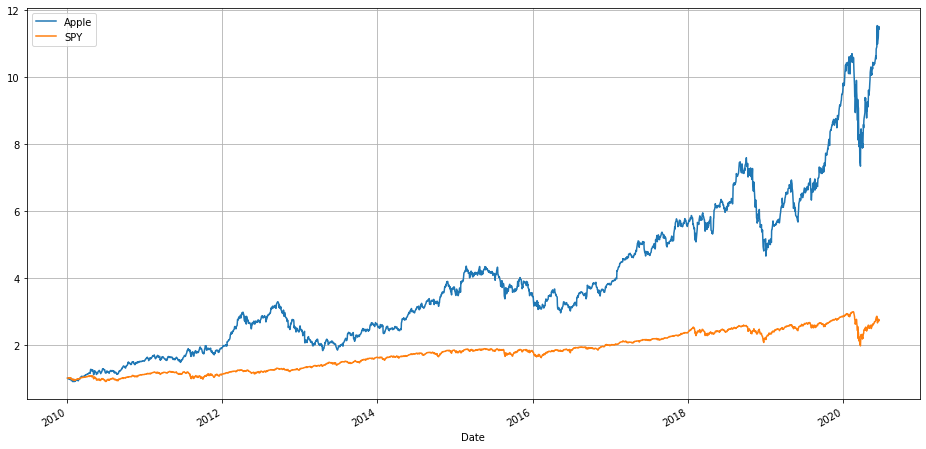

In [99]:
aapl['Cumulative'].plot(label='Apple', figsize=(16,8))
spy_etf['Cumulative'].plot(label='SPY')
plt.legend()
plt.grid()
plt.show()

In [100]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

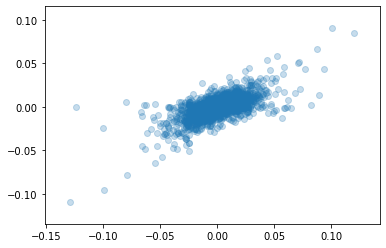

In [101]:
plt.scatter(aapl['Daily Return'], spy_etf['Daily Return'], alpha=0.25)

In [102]:
beta,alpha,r_value,p_value,std_error = stats.linregress(aapl['Daily Return'].iloc[1:], 
                                                        spy_etf['Daily Return'].iloc[1:])

In [103]:
beta

0.41416067737019285

In [104]:
alpha

-5.9356677863813575e-06

In [105]:
r_value

0.6604808646625807

In [106]:
## If you have a stock that moves inline with the index very well then you would expect to see a 
## high beta value and very low alpha value
## For example a beta of 0.5 implies that a stocks movements will theoretically be about 50% of the index
## movements
## Beta > 1 implies the stock is more volatile than the overall index
## Beta = 2.0 implies that the stock will move twice as much as the market

In [107]:
## A stock that swings more than the market over time has a beta above 1.0. If a stock moves less than the market, 
## the stock's beta is less than 1.0. High-beta stocks are supposed to be riskier but provide higher return potential; 
## low-beta stocks pose less risk but also lower returns.